## Part 1: London’s underground resilience

### I. Topological network

#### I.1. Centrality measures

##### Degree Centrality

1.Definition: 

Degree centrality is based on the notion that the importance of a node depends on the number of ties it has to other nodes in the graph. In directed networks, degree centrality involves calculating a node's in-degree and out-degree, which do not convey the same information. The formula is as follows:

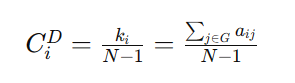

Here, ki is the degree of node， 𝑁 is the total number of nodes in the network, and aij is an element of the adjacency matrix, where  aij=1 if there is an edge between node i and node j, otherwise  aij =0. For directed networks, it is necessary to calculate the in-degree and out-degree of each node separately.

2.Contextualization in the Underground System



In the subway system, a station with high degree centrality typically means it is directly connected to many other stations in the network, indicating that it is a major transportation hub. This can be understood from the perspective of in-degree and out-degree as the number of routes entering and leaving the subway station.

For the London Underground, a station with a high in-degree may be a busy arrival point, the terminus or interchange of many routes; whereas a station with a high out-degree could be a key starting point, from where many passengers commence journeys to different parts of the city. The in-degree and out-degree of a station reflect its functional importance within the entire subway network.

4.Computation of Measures for Nodes: 

In [72]:
# Import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter

# Read the graphml file of the London Underground network
G = nx.read_graphml('london_updated.graph')

# Iterate over each node to set the 'station_name' attribute
for node, data in G.nodes(data=True):
    # 'node' is the node identifier, 'data' is a dictionary of attributes
    # Assign the node's name as the 'station_name' attribute
    G.nodes[node]['station_name'] = node  # Here it's assumed the node's name is the station name

# Since coordinates are stored as strings, use eval() function to convert them back to tuples
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

# We can also add station names to the attributes of the edges from the node properties:
nod_name1 = {(e1, e2): (G.nodes[e1]['station_name']) for e1, e2 in G.edges()}
nod_name2 = {(e1, e2): (G.nodes[e2]['station_name']) for e1, e2 in G.edges()}

# Add the station names as attributes to the edges
nx.set_edge_attributes(G, nod_name1, 'station_1_')
nx.set_edge_attributes(G, nod_name2, 'station_2_')

# Calculate the degree centrality of the nodes and store the results as node attributes
deg_london = nx.degree_centrality(G)
nx.set_node_attributes(G, dict(deg_london), 'degree')
# Create a DataFrame with nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))  # Add station names to the DataFrame
df['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))  # Add node degree centrality to the DataFrame
G_1 = G.copy()
# Sort the DataFrame by degree centrality and display the top 10 nodes
df_sorted = df.sort_values(["degree"], ascending=False)
top_10_degree_centrality = df_sorted[0:10]
top_10_degree_centrality



,station_name,degree
Stratford,Stratford,0.0225
Bank and Monument,Bank and Monument,0.0200
King's Cross St. Pancras,King's Cross St. Pancras,0.0175
Baker Street,Baker Street,0.0175
Earl's Court,Earl's Court,0.0150
Oxford Circus,Oxford Circus,0.0150
Green Park,Green Park,0.0150
Waterloo,Waterloo,0.0150
West Ham,West Ham,0.0150
Canning Town,Canning Town,0.0150


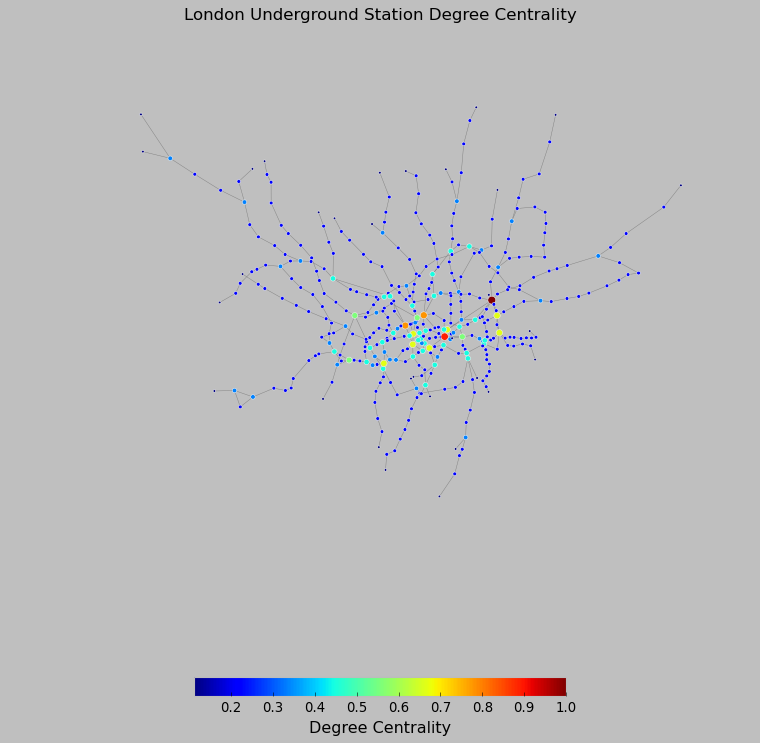

In [73]:
# Setting the color and size of nodes based on degree centrality
degree_values = [i[1]['degree'] for i in G.nodes(data=True)]

# Calculate node color values so that higher degree centrality results in a darker color
deg_color = [i[1]['degree'] / max(degree_values) for i in G.nodes(data=True)]

# Calculate node size values so that higher degree centrality results in a larger node
deg_size = [(i[1]['degree'] / max(degree_values)) * 50 for i in G.nodes(data=True)]

# Draw the graph
fig, ax = plt.subplots(figsize=(12, 12))

# Draw the edges of the network
nx.draw_networkx_edges(G, pos, edge_color='gray', width=0.4)

# Draw nodes with the color and size settings
nod = nx.draw_networkx_nodes(G, pos=pos, node_color=deg_color, node_size=deg_size)

# Add a color bar
plt.colorbar(nod, label="Degree Centrality", orientation="horizontal", shrink=0.5)

# Turn off the axis
plt.axis("off")

# Set the title
plt.title("London Underground Station Degree Centrality", fontsize=15)
plt.show()


##### Betweenness Centrality

1.Definition: 

Betweenness Centrality quantifies the proportion of all the shortest paths between pairs of nodes in a network that pass through a given node or edge. Specifically, for any pair of nodes s and t, if node i lies on the shortest path between them, then node i is granted a point, and this point is incremented for every shortest path that passes through node i. This measure reflects the degree to which a node acts as a bridge or bottleneck within the network, indicating its potential for control over information flow and its importance in maintaining network connectivity.The formula is as follows:

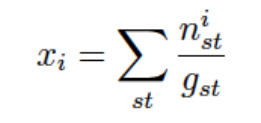

If multiple shortest paths pass through node i, the total number of these paths must be considered to adjust the betweenness centrality of node i.

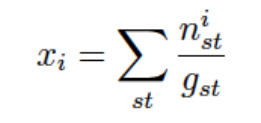

Specifically, for all pairs of nodes s and t in the network, the sum of the ratios of the number of times node i appears on these shortest paths to the total number of shortest paths is calculated. The higher this sum, the greater the intermediary role of node i in the network.

2.Contextualization in the Underground System

In the context of the underground system, the concept of betweenness centrality helps to identify key stations within the network. These stations play a significant role in the shortest paths taken by passengers traveling from one place to another, as they may serve as crucial transfer points connecting different lines or areas. A station with a high betweenness centrality value means that a large number of shortest paths pass through this station. 


4.Computation of Measures for Nodes: 

In [ ]:
# Compute the topological betweenness centrality of the network without using weights
bet_london_top = nx.betweenness_centrality(G, normalized=False)
# Set the topological betweenness centrality values as attributes for the nodes in the graph
nx.set_node_attributes(G, bet_london_top, 'betweenness_top')

# Create a new DataFrame using nodes as indices, storing station names and topological betweenness centrality
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))  # Add station names
df['betweenness_top'] = pd.Series(nx.get_node_attributes(G, 'betweenness_top'))  # Add topological betweenness centrality

# Sort by topological betweenness centrality in descending order and take the top 10
df_sorted = df.sort_values('betweenness_top', ascending=False)
df_top_betweenness_centrality = df_sorted.head(10)
df_top_betweenness_centrality 


,station_name,betweenness_top
Stratford,Stratford,23768.093434
Bank and Monument,Bank and Monument,23181.058947
Liverpool Street,Liverpool Street,21610.387049
King's Cross St. Pancras,King's Cross St. Pancras,20373.521465
Waterloo,Waterloo,19464.882323
Green Park,Green Park,17223.622114
Euston,Euston,16624.275469
Westminster,Westminster,16226.155916
Baker Street,Baker Street,15287.107612
Finchley Road,Finchley Road,13173.758009


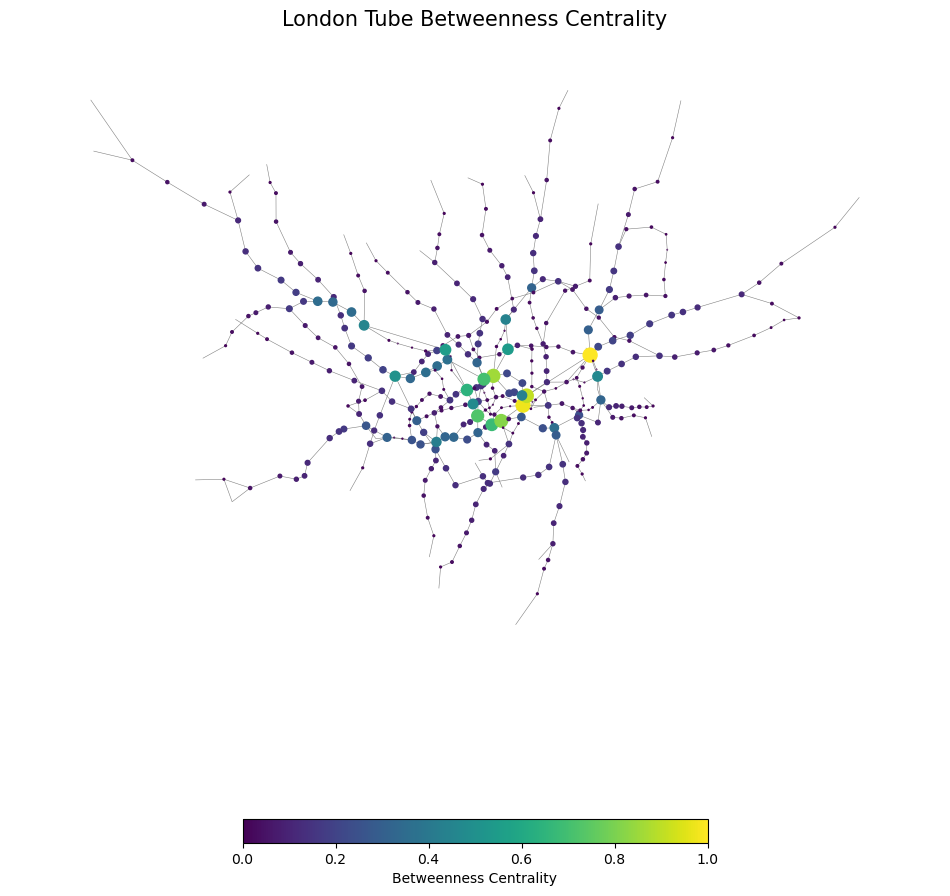

In [ ]:
# Set the color and size of nodes based on the values of topological betweenness centrality
betweenness_top_values = [i[1]['betweenness_top'] for i in G.nodes(data=True)]

# Map betweenness centrality values to colors, the larger the value, the darker the color
bet_top_color = [(i[1]['betweenness_top'] / max(betweenness_top_values)) for i in G.nodes(data=True)]
# Map betweenness centrality values to sizes, the larger the value, the bigger the node
bet_top_size = [(i[1]['betweenness_top'] / max(betweenness_top_values)) * 100 for i in G.nodes(data=True)]

# Draw the graph
fig, ax = plt.subplots(figsize=(12, 12))  # Set the size of the canvas

# Draw the edges of the network
nx.draw_networkx_edges(G, pos, edge_color='gray', width=0.4)
# Draw the nodes of the network, setting the node color and size according to betweenness centrality values
nod = nx.draw_networkx_nodes(G,
                             pos=pos,
                             node_color=bet_top_color,
                             node_size=bet_top_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London Tube Betweenness Centrality",fontsize=15)
plt.show()


##### Closeness Centrality

1.Definition: 

The closeness centrality of a node is based on the concept of minimum distance or geodesic distance between nodes. For node i, its closeness centrality is defined based on the average distance to all other nodes in the network. Closeness centrality operates under the assumption that a node is more important if it is closer, on average, to all other nodes in the network, meaning a shorter average distance implies greater importance. Specifically, the closeness centrality of node i is the reciprocal of the sum of the shortest path distances from all other nodes to node i. The formula is as follows:

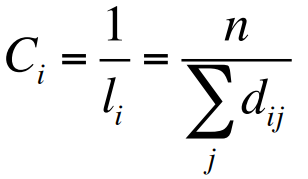

Here, dij is the shortest path length between node i and node j, li is the average distance from node i to all other nodes, and n is the total number of nodes in the network. Through the formula, the closeness centrality of each node can be calculated. The higher the closeness centrality, the more prominent the central position of the node in the network.

2.Contextualization in the Underground System

In the subway system, closeness centrality helps identify which stations are crucial for maintaining the efficiency and connectivity of the entire network. A station with higher closeness centrality is, on average, closer to all other stations in the system. This means that fewer transfers are needed from that station to reach any other station in the network, making it more likely to be frequently chosen by passengers as a transfer point. Properly identifying such stations can prevent widespread subway delays and impacts on a large number of passengers' travel efficiency when the operation of these stations is not smooth.

4.Computation of Measures for Nodes: 

In [ ]:
# Calculate the topological closeness centrality for the network
closeness_top = nx.closeness_centrality(G)

# Add the closeness centrality values as attributes to the nodes in the graph
nx.set_node_attributes(G, closeness_top, 'closeness_top')

# Convert node attributes to a DataFrame, using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))  # Add station names to the DataFrame
df['closeness_top'] = pd.Series(nx.get_node_attributes(G, 'closeness_top'))  # Add topological closeness centrality to the DataFrame

# Sort the DataFrame by closeness centrality and extract the top 10 nodes
df_sorted = df.sort_values('closeness_top', ascending=False)
top_10_closeness_centrality = df_sorted.head(10)
top_10_closeness_centrality

,station_name,closeness_top
Green Park,Green Park,0.114778
Bank and Monument,Bank and Monument,0.113572
King's Cross St. Pancras,King's Cross St. Pancras,0.113443
Westminster,Westminster,0.112549
Waterloo,Waterloo,0.112265
Oxford Circus,Oxford Circus,0.111204
Bond Street,Bond Street,0.110988
Farringdon,Farringdon,0.110742
Angel,Angel,0.110742
Moorgate,Moorgate,0.110314


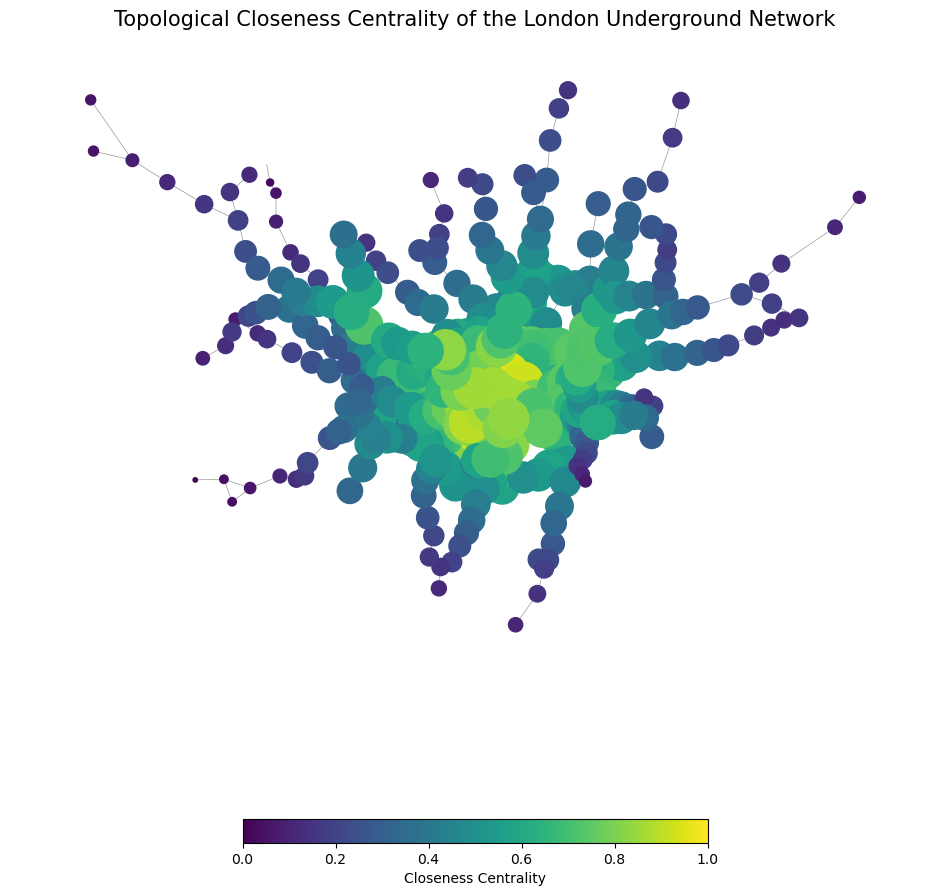

In [ ]:
# Set the color and size of nodes according to closeness centrality values
closeness_values = [attr['closeness_top'] for _, attr in G.nodes(data=True)]
max_closeness_val = max(closeness_values)
min_closeness_val = min(closeness_values)

# Calculate node color based on closeness centrality
closeness_color = [(val - min_closeness_val) / (max_closeness_val - min_closeness_val) 
                   for val in closeness_values]
# Calculate node size based on closeness centrality
closeness_size = [(val - min_closeness_val) / (max_closeness_val - min_closeness_val) * 1000 
                  for val in closeness_values]

# Plot the network graph
fig, ax = plt.subplots(figsize=(12, 12))
nx.draw_networkx_edges(G, pos, edge_color='gray', width=0.4)
nodes = nx.draw_networkx_nodes(G, pos, node_color=closeness_color, node_size=closeness_size)

# Add a color bar to the plot
plt.colorbar(nodes, label='Closeness Centrality', orientation='horizontal', shrink=0.5)
plt.axis('off')  # Hide the axes
plt.title('Topological Closeness Centrality of the London Underground Network', fontsize=15)
plt.show()

#### I.2. Impact measures:

 ##### Information centralities

1.Explanation

Information centrality allows for the comparison of the impact on the network's global efficiency before and after the removal of a certain node. If the efficiency of the network is defined by the average reciprocal of the shortest paths between pairs of nodes, then the importance of a node can be assessed by observing how this average value changes when the node is removed.

2.Universality of the method


Information centrality is a metric that applies not only to the London Underground network but to other types of networks as well. This indicator is based on the average of the reciprocals of the shortest path distances between all node pairs within a network, making the measurement independent of the network type. Therefore, information centrality can be employed to assess the impact of critical nodes in any other complex network type.

 ##### 2.Estrada Index

1.Explanation

The Estrada index is a global measure of network that quantifies the overall connectivity of a network based on the eigenvalues of its adjacency matrix. It involves summing the exponentials of all the eigenvalues of the adjacency matrix. The change in the Estrada index of the entire network after node removal can reflect the contribution of that node to network connectivity.

2.Universality of the method


The Estrada index is applicable to a wide range of networks, not just the London Underground. Its universality comes from relying on the fundamental network properties of eigenvalues and their exponentials, which are independent of the network type or real-world system. It represents connectivity patterns in the network, and the index measures overall network robustness and complexity. Changes in the Estrada index when a node is removed can thus indicate the node's importance and its impact on network connectivity.

#### I.3. Node removal:

##### Degree Centrality

In [11]:
# Non-sequential removal
import pandas as pd
import networkx as nx

def calculate_global_efficiency_and_num_components(G):
    # Calculate global efficiency
    efficiency = nx.global_efficiency(G)
    # Calculate the number of connected components
    num_connected_components = nx.number_connected_components(G)
    return efficiency, num_connected_components

# Clone the original graph
G_cloned_non_sequential = G.copy()

# Pre-calculate the degree centrality of all nodes
initial_degree_centrality = nx.degree_centrality(G_cloned_non_sequential)
# Sort nodes based on degree centrality
sorted_nodes_by_degree = sorted(initial_degree_centrality, key=initial_degree_centrality.get, reverse=True)

# Calculate the initial network's global efficiency and number of connected components
initial_efficiency, initial_num_components = calculate_global_efficiency_and_num_components(G_cloned_non_sequential)

# Remove nodes and record efficiency and number of connected components
non_sequential_removed_nodes_degree = []
non_sequential_efficiency_degree = [initial_efficiency]
non_sequential_num_components_degree = [initial_num_components]

# Remove 10 nodes ranked by pre-calculated degree centrality
for node in sorted_nodes_by_degree[:10]:
    # Remove the node with the highest degree centrality currently
    G_cloned_non_sequential.remove_node(node)
    non_sequential_removed_nodes_degree.append(node)
    
    # Calculate new network efficiency and number of connected components after removing the node
    efficiency, num_components = calculate_global_efficiency_and_num_components(G_cloned_non_sequential)
    
    # Record efficiency and number of connected components
    non_sequential_efficiency_degree.append(efficiency)
    non_sequential_num_components_degree.append(num_components)

# Create a DataFrame to store the results
non_sequential_degree_results_df = pd.DataFrame({
    'Removed Nodes': ['Initial State'] + non_sequential_removed_nodes_degree,
    'Network Efficiency': non_sequential_efficiency_degree,
    'Number of Connected Components': non_sequential_num_components_degree
})

# Display the DataFrame with results from the non-sequential removal strategy
print(non_sequential_degree_results_df)


               Removed Nodes  Network Efficiency  \
0              Initial State            0.101256   
1                  Stratford            0.088917   
2          Bank and Monument            0.085862   
3               Baker Street            0.082033   
4   King's Cross St. Pancras            0.075700   
5           Liverpool Street            0.073903   
6                   Waterloo            0.071871   
7                 Green Park            0.070825   
8              Oxford Circus            0.069979   
9               Earl's Court            0.068257   
10                  West Ham            0.065872   

    Number of Connected Components  
0                                1  
1                                3  
2                                3  
3                                3  
4                                4  
5                                5  
6                                5  
7                                5  
8                                6  
9    

In [16]:
# Sequential removal
import pandas as pd
import networkx as nx

def calculate_global_efficiency_and_num_components(G):
    # Calculate global efficiency
    efficiency = nx.global_efficiency(G)
    # Calculate the number of connected components
    num_connected_components = nx.number_connected_components(G)
    return efficiency, num_connected_components

# Clone the original graph
G_cloned_sequential = G.copy()

# Calculate the initial network's global efficiency and number of connected components
initial_efficiency, initial_num_components = calculate_global_efficiency_and_num_components(G_cloned_sequential)

# Initialize lists to keep track of the changes in efficiency and number of connected components
sequential_removed_nodes = ['Initial State']
sequential_efficiency = [initial_efficiency]
sequential_num_components = [initial_num_components]

# Sequentially remove nodes and record efficiency and number of connected components after each removal
for _ in range(10):
    # Re-calculate the betweenness centrality of all nodes
    current_betweenness_centrality = nx.betweenness_centrality(G_cloned_sequential)
    # Find the node with the highest current betweenness centrality
    highest_betweenness_node = max(current_betweenness_centrality, key=current_betweenness_centrality.get)
    
    # Remove the node with the highest betweenness centrality
    G_cloned_sequential.remove_node(highest_betweenness_node)
    sequential_removed_nodes.append(highest_betweenness_node)
    
    # Calculate new network efficiency and number of connected components
    efficiency, num_components = calculate_global_efficiency_and_num_components(G_cloned_sequential)
    
    # Record efficiency and number of connected components
    sequential_efficiency.append(efficiency)
    sequential_num_components.append(num_components)

# Create a DataFrame to store the results
sequential_removal_results_df = pd.DataFrame({
    'Removed Nodes': sequential_removed_nodes,
    'Network Efficiency': sequential_efficiency,
    'Number of Connected Components': sequential_num_components
})

# Display the DataFrame with results from the sequential removal strategy
print(sequential_removal_results_df)


               Removed Nodes  Network Efficiency  \
0              Initial State            0.101256   
1                  Stratford            0.088917   
2   King's Cross St. Pancras            0.084603   
3                   Waterloo            0.081829   
4          Bank and Monument            0.077678   
5               Canada Water            0.072832   
6             West Hampstead            0.053210   
7               Earl's Court            0.051656   
8            Shepherd's Bush            0.045844   
9                     Euston            0.041631   
10              Baker Street            0.038164   

    Number of Connected Components  
0                                1  
1                                3  
2                                3  
3                                3  
4                                3  
5                                3  
6                                4  
7                                4  
8                                5  
9    

In [19]:
import matplotlib.pyplot as plt

# Check available styles
available_styles = plt.style.available
print("Available styles:", available_styles)

# If 'seaborn-darkgrid' is in the available styles, use it, otherwise use the default style
if 'seaborn-darkgrid' in available_styles:
    plt.style.use('seaborn-darkgrid')
else:
    print("'seaborn-darkgrid' not found, using default style.")

Available styles: ['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
'seaborn-darkgrid' not found, using default style.


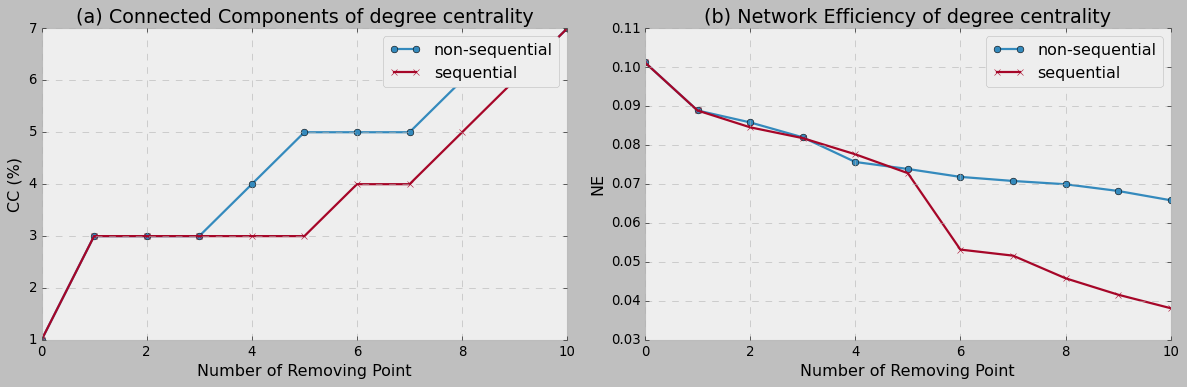

In [25]:
import matplotlib.pyplot as plt

# Assuming non_sequential_degree_results_df and sequential_removal_results_df are the DataFrames you have from running the above code

# Setting the style
plt.style.use('bmh')

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plotting LCC (Largest Connected Component) for both non-sequential and sequential removal strategies
axes[0].plot(non_sequential_degree_results_df.index, non_sequential_degree_results_df['Number of Connected Components'], label='non-sequential', marker='o')
axes[0].plot(sequential_removal_results_df.index, sequential_removal_results_df['Number of Connected Components'], label='sequential', marker='x')

# Adding titles and labels
axes[0].set_title('(a) Connected Components of degree centrality')
axes[0].set_xlabel('Number of Removing Point')
axes[0].set_ylabel('CC (%)')

# Plotting AGE (Average Global Efficiency) for both non-sequential and sequential removal strategies
axes[1].plot(non_sequential_degree_results_df.index, non_sequential_degree_results_df['Network Efficiency'], label='non-sequential', marker='o')
axes[1].plot(sequential_removal_results_df.index, sequential_removal_results_df['Network Efficiency'], label='sequential', marker='x')

# Adding titles and labels
axes[1].set_title('(b) Network Efficiency of degree centrality')
axes[1].set_xlabel('Number of Removing Point')
axes[1].set_ylabel('NE')

# Adding legends
axes[0].legend()
axes[1].legend()

# Adjusting the layout
plt.tight_layout()

# Displaying the plots
plt.show()


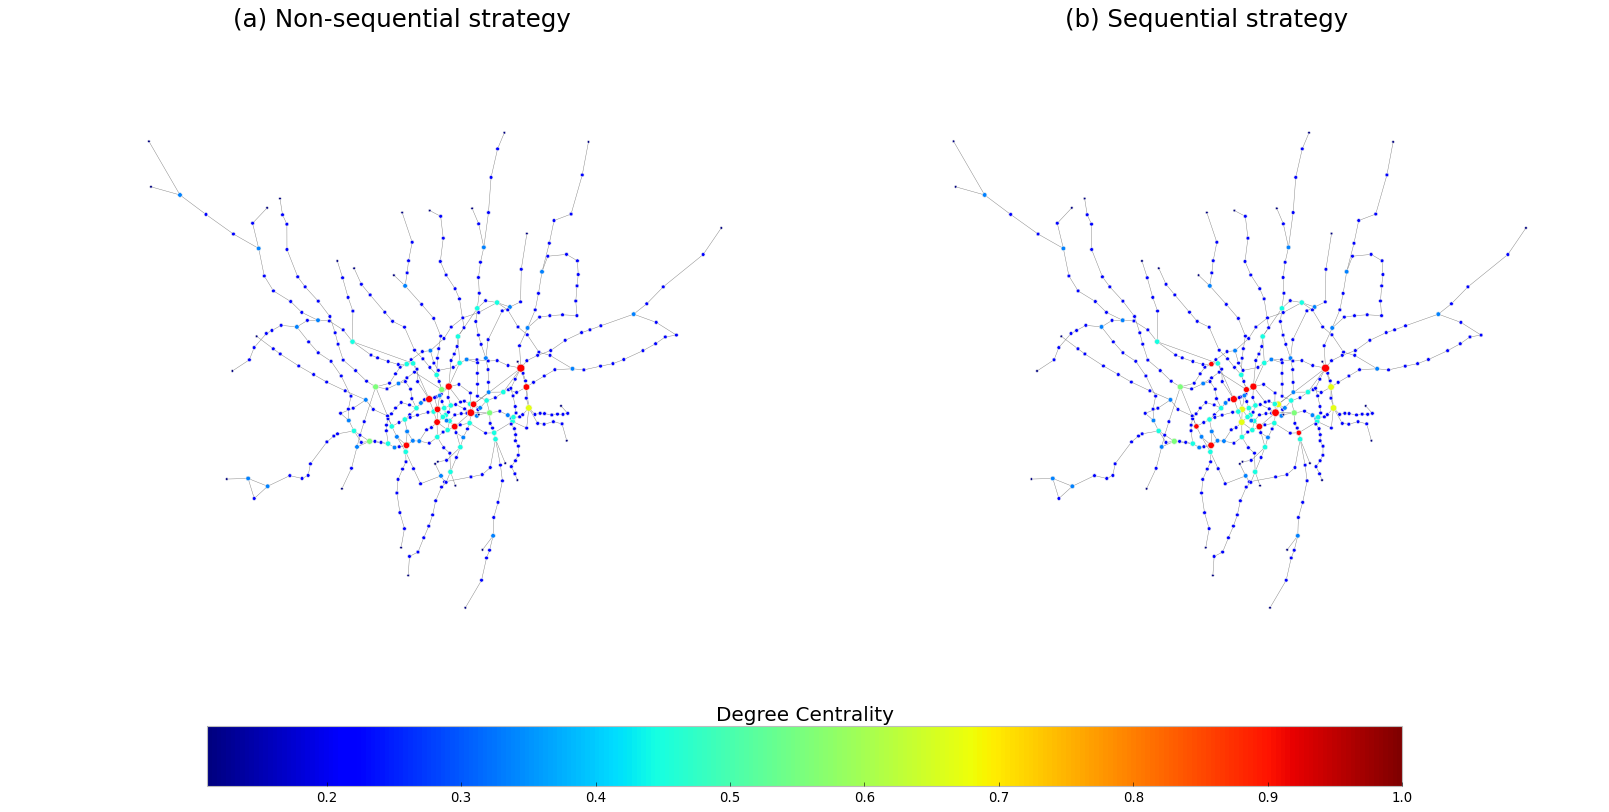

In [33]:
import matplotlib.pyplot as plt
import networkx as nx


# Calculate sizes and colors for all nodes in G based on degree centrality
degree_values = [G.degree(node) for node in G]
deg_color = [value / max(degree_values) for value in degree_values]
deg_size = [(value / max(degree_values)) * 50 for value in degree_values]

# Calculate sizes for nodes in G_top (removed in non-sequential strategy)
deg_size_sub = [(G.degree(node) / max(degree_values)) * 50 for node in G_top]

# Calculate sizes for nodes in G_top_seq (removed in sequential strategy)
deg_size_seq = [(G.degree(node) / max(degree_values)) * 50 for node in G_top_seq]

# Define node positions
pos = nx.get_node_attributes(G, 'coords')

fig, ax = plt.subplots(1, 2, figsize=(20, 10), constrained_layout=True)
fig.patch.set_facecolor('white')  # Set the background color of the figure

# Non-sequential strategy plot
edges = nx.draw_networkx_edges(G, pos, edge_color='gray', width=0.4, ax=ax[0])
nodes = nx.draw_networkx_nodes(G, pos, node_color=deg_color, node_size=deg_size, ax=ax[0])
nx.draw_networkx_nodes(G_top, pos, node_color='red', node_size=deg_size_sub, ax=ax[0])
ax[0].set_title("(a) Non-sequential strategy", fontsize=22)
ax[0].axis("off")

# Sequential strategy plot
edges = nx.draw_networkx_edges(G, pos, edge_color='gray', width=0.4, ax=ax[1])
nodes = nx.draw_networkx_nodes(G, pos, node_color=deg_color, node_size=deg_size, ax=ax[1])
nx.draw_networkx_nodes(G_top_seq, pos, node_color='red', node_size=deg_size_seq, ax=ax[1])
ax[1].set_title("(b) Sequential strategy", fontsize=22)
ax[1].axis("off")

# Add a color bar for degree centrality
cbar = plt.colorbar(nodes, orientation="horizontal", shrink=0.75, ax=ax.ravel().tolist(), pad=0.02)
cbar.set_label("Degree Centrality", fontsize=18)
cbar.ax.xaxis.set_label_position('top')

plt.show()



##### Betweenness Centrality

In [12]:
# Non-sequential removal
import pandas as pd
import networkx as nx

def calculate_global_efficiency_and_num_components(G):
    # Calculate global efficiency
    efficiency = nx.global_efficiency(G)
    # Calculate the number of connected components
    num_connected_components = nx.number_connected_components(G)
    return efficiency, num_connected_components

# Clone the original graph
G_cloned_non_sequential = G.copy()

# Pre-calculate the betweenness centrality of all nodes
initial_betweenness_centrality = nx.betweenness_centrality(G_cloned_non_sequential)
# Sort nodes based on betweenness centrality
sorted_nodes_by_betweenness = sorted(initial_betweenness_centrality, key=initial_betweenness_centrality.get, reverse=True)

# Calculate the initial network's global efficiency and number of connected components
initial_efficiency, initial_num_components = calculate_global_efficiency_and_num_components(G_cloned_non_sequential)

# Remove nodes and record efficiency and number of connected components
non_sequential_removed_nodes_betweenness = []
non_sequential_efficiency_betweenness = [initial_efficiency]
non_sequential_num_components_betweenness = [initial_num_components]

# Remove 10 nodes ranked by pre-calculated betweenness centrality
for node in sorted_nodes_by_betweenness[:10]:
    # Remove the node with the highest betweenness centrality currently
    G_cloned_non_sequential.remove_node(node)
    non_sequential_removed_nodes_betweenness.append(node)
    
    # Calculate new network efficiency and number of connected components after removing the node
    efficiency, num_components = calculate_global_efficiency_and_num_components(G_cloned_non_sequential)
    
    # Record efficiency and number of connected components
    non_sequential_efficiency_betweenness.append(efficiency)
    non_sequential_num_components_betweenness.append(num_components)

# Create a DataFrame to store the results
non_sequential_betweenness_results_df = pd.DataFrame({
    'Removed Nodes': ['Initial State'] + non_sequential_removed_nodes_betweenness,
    'Network Efficiency': non_sequential_efficiency_betweenness,
    'Number of Connected Components': non_sequential_num_components_betweenness
})

# Display the DataFrame with results from the non-sequential removal strategy
print(non_sequential_betweenness_results_df)


               Removed Nodes  Network Efficiency  \
0              Initial State            0.101256   
1                  Stratford            0.088917   
2          Bank and Monument            0.085862   
3           Liverpool Street            0.084963   
4   King's Cross St. Pancras            0.078498   
5                   Waterloo            0.075942   
6                 Green Park            0.074152   
7                     Euston            0.068206   
8                Westminster            0.067660   
9               Baker Street            0.064700   
10             Finchley Road            0.063139   

    Number of Connected Components  
0                                1  
1                                3  
2                                3  
3                                3  
4                                4  
5                                4  
6                                4  
7                                5  
8                                5  
9    

In [26]:
# Sequential removal based on Betweenness Centrality
import pandas as pd
import networkx as nx

def calculate_global_efficiency_and_num_components(G):
    # Calculate global efficiency
    efficiency = nx.global_efficiency(G)
    # Calculate the number of connected components
    num_connected_components = nx.number_connected_components(G)
    return efficiency, num_connected_components

# Clone the original graph
G_cloned_sequential = G.copy()

# Calculate the initial network's global efficiency and number of connected components
initial_efficiency, initial_num_components = calculate_global_efficiency_and_num_components(G_cloned_sequential)

# Initialize lists to keep track of the changes in efficiency and number of connected components
sequential_removed_nodes_betweenness = ['Initial State']
sequential_efficiency_betweenness = [initial_efficiency]
sequential_num_components_betweenness = [initial_num_components]

# Sequentially remove nodes based on Betweenness Centrality and record efficiency and number of connected components after each removal
for _ in range(10):
    # Re-calculate the betweenness centrality of all nodes
    current_betweenness_centrality = nx.betweenness_centrality(G_cloned_sequential)
    # Find the node with the highest current betweenness centrality
    highest_betweenness_node = max(current_betweenness_centrality, key=current_betweenness_centrality.get)
    
    # Remove the node with the highest betweenness centrality
    G_cloned_sequential.remove_node(highest_betweenness_node)
    sequential_removed_nodes_betweenness.append(highest_betweenness_node)
    
    # Calculate new network efficiency and number of connected components
    efficiency, num_components = calculate_global_efficiency_and_num_components(G_cloned_sequential)
    
    # Record efficiency and number of connected components
    sequential_efficiency_betweenness.append(efficiency)
    sequential_num_components_betweenness.append(num_components)

# Create a DataFrame to store the results
sequential_removal_results_df_betweenness = pd.DataFrame({
    'Removed Nodes': sequential_removed_nodes_betweenness,
    'Network Efficiency': sequential_efficiency_betweenness,
    'Number of Connected Components': sequential_num_components_betweenness
})

# Display the DataFrame with results from the sequential removal strategy based on Betweenness Centrality
print(sequential_removal_results_df_betweenness)


               Removed Nodes  Network Efficiency  \
0              Initial State            0.101256   
1                  Stratford            0.088917   
2   King's Cross St. Pancras            0.084603   
3                   Waterloo            0.081829   
4          Bank and Monument            0.077678   
5               Canada Water            0.072832   
6             West Hampstead            0.053210   
7               Earl's Court            0.051656   
8            Shepherd's Bush            0.045844   
9                     Euston            0.041631   
10              Baker Street            0.038164   

    Number of Connected Components  
0                                1  
1                                3  
2                                3  
3                                3  
4                                3  
5                                3  
6                                4  
7                                4  
8                                5  
9    

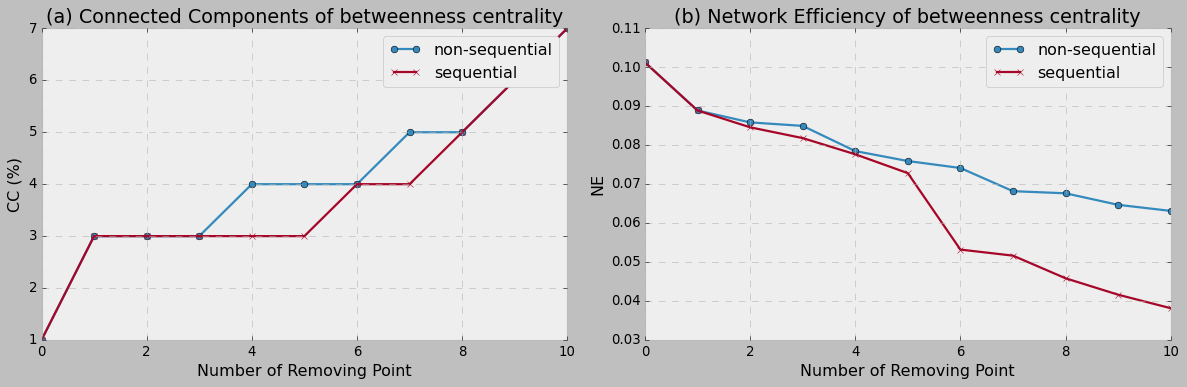

In [28]:
import matplotlib.pyplot as plt

# Setting the style
plt.style.use('bmh')

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plotting LCC (Largest Connected Component) for both non-sequential and sequential removal strategies
axes[0].plot(non_sequential_betweenness_results_df.index, non_sequential_betweenness_results_df['Number of Connected Components'], label='non-sequential', marker='o')
axes[0].plot(sequential_removal_results_df_betweenness.index, sequential_removal_results_df_betweenness['Number of Connected Components'], label='sequential', marker='x')

# Adding titles and labels
axes[0].set_title('(a) Connected Components of betweenness centrality')
axes[0].set_xlabel('Number of Removing Point')
axes[0].set_ylabel('CC (%)')

# Plotting AGE (Average Global Efficiency) for both non-sequential and sequential removal strategies
axes[1].plot(non_sequential_betweenness_results_df.index, non_sequential_betweenness_results_df['Network Efficiency'], label='non-sequential', marker='o')
axes[1].plot(sequential_removal_results_df_betweenness.index, sequential_removal_results_df_betweenness['Network Efficiency'], label='sequential', marker='x')

# Adding titles and labels
axes[1].set_title('(b) Network Efficiency of betweenness centrality')
axes[1].set_xlabel('Number of Removing Point')
axes[1].set_ylabel('NE')

# Adding legends
axes[0].legend()
axes[1].legend()

# Adjusting the layout
plt.tight_layout()

# Displaying the plots
plt.show()


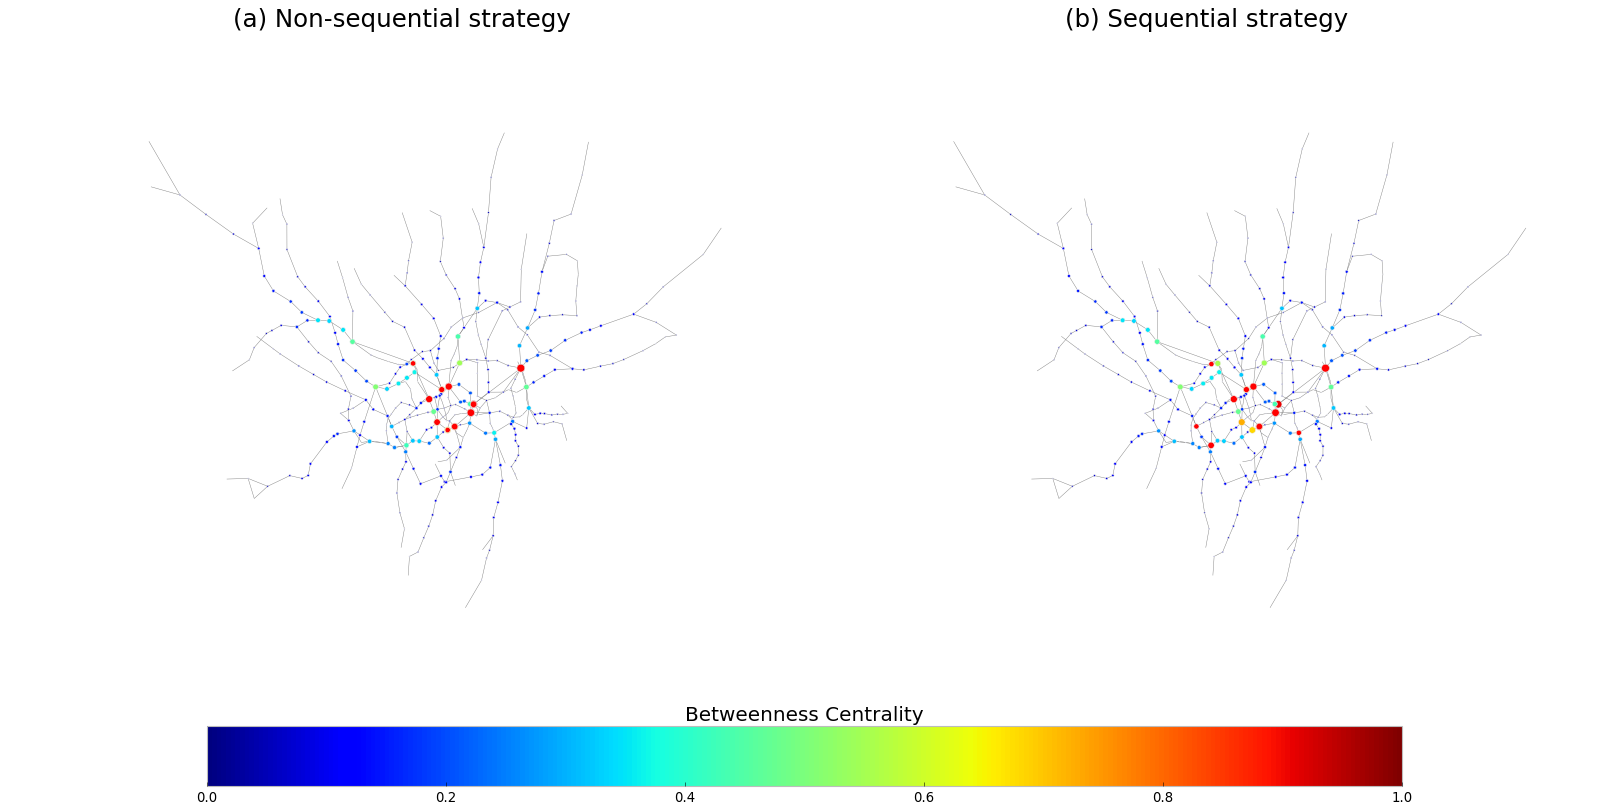

In [37]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

# Calculate betweenness centrality values for all nodes in the original graph
betweenness_values = [val for val in nx.betweenness_centrality(G).values()]
betweenness_color = [val / max(betweenness_values) for val in betweenness_values]
betweenness_size = [(val / max(betweenness_values)) * 50 for val in betweenness_values]

# Extract the nodes removed during the non-sequential and sequential strategies
non_sequential_removed_nodes = non_sequential_betweenness_results_df['Removed Nodes'][1:]  # Exclude 'Initial State'
sequential_removed_nodes = sequential_removal_results_df_betweenness['Removed Nodes']

# Generate subgraphs
G_top_non_seq = G.subgraph(non_sequential_removed_nodes)
G_top_seq = G.subgraph(sequential_removed_nodes)

# Calculate sizes for nodes in the subgraphs based on betweenness centrality
betweenness_size_non_seq = [(G.degree(node) / max(degree_values)) * 50 for node in G_top_non_seq]
betweenness_size_seq = [(G.degree(node) / max(degree_values)) * 50 for node in G_top_seq]

# Plotting the graph
fig, ax = plt.subplots(1, 2, figsize=(20, 10), constrained_layout=True)
fig.patch.set_facecolor('white')

# Non-sequential strategy plot
nx.draw_networkx_edges(G, pos, edge_color='gray', width=0.4, ax=ax[0])
nodes = nx.draw_networkx_nodes(G, pos, node_color=betweenness_color, node_size=betweenness_size, ax=ax[0])
nx.draw_networkx_nodes(G_top_non_seq, pos, node_color='red', node_size=betweenness_size_non_seq, ax=ax[0])
ax[0].set_title("(a) Non-sequential strategy", fontsize=22)
ax[0].axis("off")

# Sequential strategy plot
nx.draw_networkx_edges(G, pos, edge_color='gray', width=0.4, ax=ax[1])
nodes = nx.draw_networkx_nodes(G, pos, node_color=betweenness_color, node_size=betweenness_size, ax=ax[1])
nx.draw_networkx_nodes(G_top_seq, pos, node_color='red', node_size=betweenness_size_seq, ax=ax[1])
ax[1].set_title("(b) Sequential strategy", fontsize=22)
ax[1].axis("off")

# Color bar for betweenness centrality
cbar = plt.colorbar(nodes, orientation="horizontal", shrink=0.75, ax=ax.ravel().tolist(), pad=0.02)
cbar.set_label("Betweenness Centrality", fontsize=18)
cbar.ax.xaxis.set_label_position('top')

plt.show()



##### closeness_centrality

In [13]:
# Non-sequential removal
import pandas as pd
import networkx as nx

def calculate_global_efficiency_and_num_components(G):
    # Calculate global efficiency
    efficiency = nx.global_efficiency(G)
    # Calculate the number of connected components
    num_connected_components = nx.number_connected_components(G)
    return efficiency, num_connected_components

# Clone the original graph
G_cloned_non_sequential = G.copy()

# Pre-calculate the closeness centrality of all nodes
initial_closeness_centrality = nx.closeness_centrality(G_cloned_non_sequential)
# Sort nodes based on closeness centrality
sorted_nodes_by_closeness = sorted(initial_closeness_centrality, key=initial_closeness_centrality.get, reverse=True)

# Calculate the initial network's global efficiency and number of connected components
initial_efficiency, initial_num_components = calculate_global_efficiency_and_num_components(G_cloned_non_sequential)

# Remove nodes and record efficiency and number of connected components
non_sequential_removed_nodes_closeness = []
non_sequential_efficiency_closeness = [initial_efficiency]
non_sequential_num_components_closeness = [initial_num_components]

# Remove 10 nodes ranked by pre-calculated closeness centrality
for node in sorted_nodes_by_closeness[:10]:
    # Remove the node with the highest closeness centrality currently
    G_cloned_non_sequential.remove_node(node)
    non_sequential_removed_nodes_closeness.append(node)
    
    # Calculate new network efficiency and number of connected components after removing the node
    efficiency, num_components = calculate_global_efficiency_and_num_components(G_cloned_non_sequential)
    
    # Record efficiency and number of connected components
    non_sequential_efficiency_closeness.append(efficiency)
    non_sequential_num_components_closeness.append(num_components)

# Create a DataFrame to store the results
non_sequential_closeness_results_df = pd.DataFrame({
    'Removed Nodes': ['Initial State'] + non_sequential_removed_nodes_closeness,
    'Network Efficiency': non_sequential_efficiency_closeness,
    'Number of Connected Components': non_sequential_num_components_closeness
})

# Display the DataFrame with results from the non-sequential removal strategy
print(non_sequential_closeness_results_df)


               Removed Nodes  Network Efficiency  \
0              Initial State            0.101256   
1                 Green Park            0.099190   
2          Bank and Monument            0.094872   
3   King's Cross St. Pancras            0.087934   
4                Westminster            0.087372   
5                   Waterloo            0.084859   
6              Oxford Circus            0.082781   
7                Bond Street            0.082581   
8                 Farringdon            0.082600   
9                      Angel            0.082622   
10                  Moorgate            0.081670   

    Number of Connected Components  
0                                1  
1                                1  
2                                1  
3                                1  
4                                1  
5                                1  
6                                1  
7                                1  
8                                1  
9    

In [27]:
# Sequential removal based on Closeness Centrality
import pandas as pd
import networkx as nx

def calculate_global_efficiency_and_num_components(G):
    # Calculate global efficiency
    efficiency = nx.global_efficiency(G)
    # Calculate the number of connected components
    num_connected_components = nx.number_connected_components(G)
    return efficiency, num_connected_components

# Clone the original graph
G_cloned_sequential = G.copy()

# Calculate the initial network's global efficiency and number of connected components
initial_efficiency, initial_num_components = calculate_global_efficiency_and_num_components(G_cloned_sequential)

# Initialize lists to keep track of the changes in efficiency and number of connected components
sequential_removed_nodes_closeness = ['Initial State']
sequential_efficiency_closeness = [initial_efficiency]
sequential_num_components_closeness = [initial_num_components]

# Sequentially remove nodes based on Closeness Centrality and record efficiency and number of connected components after each removal
for _ in range(10):
    # Re-calculate the closeness centrality of all nodes
    current_closeness_centrality = nx.closeness_centrality(G_cloned_sequential)
    # Find the node with the highest current closeness centrality
    highest_closeness_node = max(current_closeness_centrality, key=current_closeness_centrality.get)
    
    # Remove the node with the highest closeness centrality
    G_cloned_sequential.remove_node(highest_closeness_node)
    sequential_removed_nodes_closeness.append(highest_closeness_node)
    
    # Calculate new network efficiency and number of connected components
    efficiency, num_components = calculate_global_efficiency_and_num_components(G_cloned_sequential)
    
    # Record efficiency and number of connected components
    sequential_efficiency_closeness.append(efficiency)
    sequential_num_components_closeness.append(num_components)

# Create a DataFrame to store the results
sequential_removal_results_df_closeness = pd.DataFrame({
    'Removed Nodes': sequential_removed_nodes_closeness,
    'Network Efficiency': sequential_efficiency_closeness,
    'Number of Connected Components': sequential_num_components_closeness
})

# Display the DataFrame with results from the sequential removal strategy based on Closeness Centrality
print(sequential_removal_results_df_closeness)


               Removed Nodes  Network Efficiency  \
0              Initial State            0.101256   
1                 Green Park            0.099190   
2   King's Cross St. Pancras            0.094435   
3                   Waterloo            0.091816   
4          Bank and Monument            0.085426   
5             West Hampstead            0.080544   
6               Canada Water            0.058101   
7                  Stratford            0.051884   
8               Earl's Court            0.050350   
9            Shepherd's Bush            0.044395   
10             Oxford Circus            0.042958   

    Number of Connected Components  
0                                1  
1                                1  
2                                1  
3                                1  
4                                1  
5                                1  
6                                2  
7                                4  
8                                4  
9    

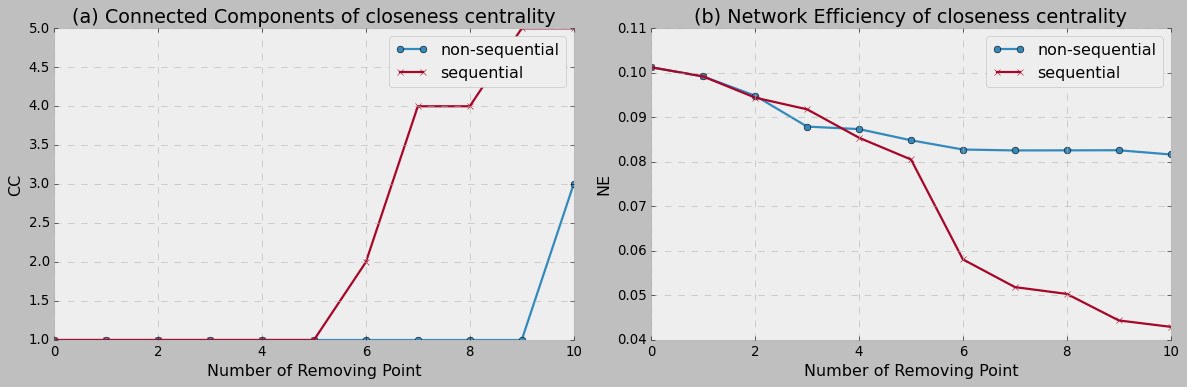

In [29]:
import matplotlib.pyplot as plt


# Setting the style
plt.style.use('bmh')

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plotting Number of Connected Components (CC) for both non-sequential and sequential removal strategies
axes[0].plot(non_sequential_closeness_results_df.index, non_sequential_closeness_results_df['Number of Connected Components'], label='non-sequential', marker='o')
axes[0].plot(sequential_removal_results_df_closeness.index, sequential_removal_results_df_closeness['Number of Connected Components'], label='sequential', marker='x')

# Adding titles and labels
axes[0].set_title('(a) Connected Components of closeness centrality')
axes[0].set_xlabel('Number of Removing Point')
axes[0].set_ylabel('CC')

# Plotting Network Efficiency (NE) for both non-sequential and sequential removal strategies
axes[1].plot(non_sequential_closeness_results_df.index, non_sequential_closeness_results_df['Network Efficiency'], label='non-sequential', marker='o')
axes[1].plot(sequential_removal_results_df_closeness.index, sequential_removal_results_df_closeness['Network Efficiency'], label='sequential', marker='x')

# Adding titles and labels
axes[1].set_title('(b) Network Efficiency of closeness centrality')
axes[1].set_xlabel('Number of Removing Point')
axes[1].set_ylabel('NE')

# Adding legends
axes[0].legend()
axes[1].legend()

# Adjusting the layout
plt.tight_layout()

# Displaying the plots
plt.show()


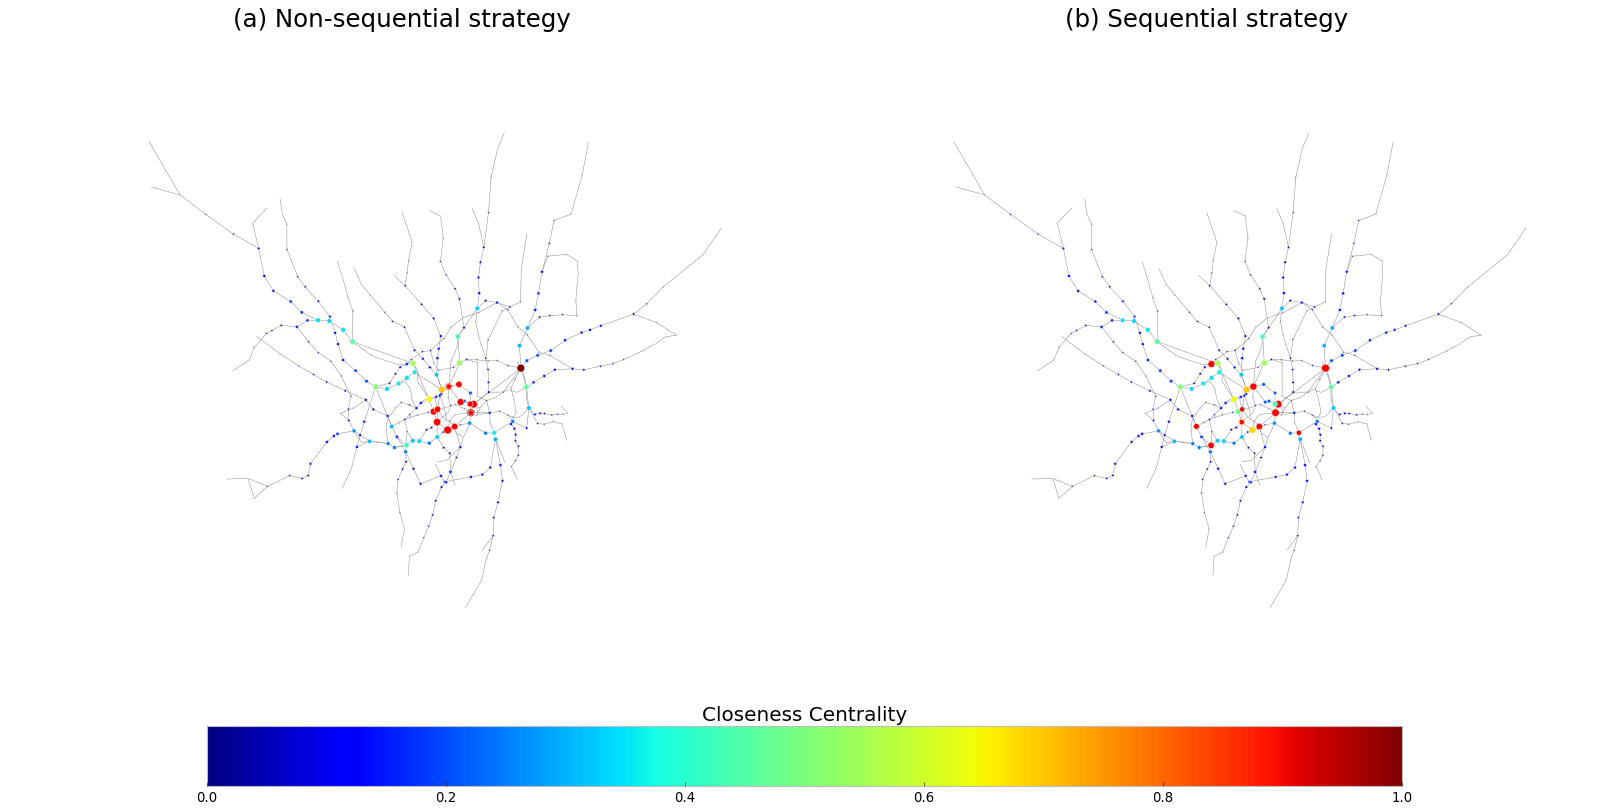

In [38]:
import matplotlib.pyplot as plt
import networkx as nx

# Make sure you've run your non-sequential and sequential removal strategies before this

# Calculate closeness centrality values for all nodes in the original graph
closeness_values = [val for val in nx.closeness_centrality(G).values()]
close_color = [val / max(closeness_values) for val in closeness_values]
close_size = [(val / max(closeness_values)) * 50 for val in closeness_values]

# Extract the nodes removed during the non-sequential and sequential strategies
non_sequential_removed_nodes = non_sequential_closeness_results_df['Removed Nodes'][1:]  # Exclude 'Initial State'
sequential_removed_nodes = sequential_removal_results_df_closeness['Removed Nodes'][1:]  # Exclude 'Initial State'

# Generate subgraphs
G_top_non_seq = G.subgraph(non_sequential_removed_nodes)
G_top_seq = G.subgraph(sequential_removed_nodes)

# Calculate sizes for nodes in the subgraphs based on closeness centrality
close_size_non_seq = [(G.degree(node) / max(degree_values)) * 50 for node in G_top_non_seq]
close_size_seq = [(G.degree(node) / max(degree_values)) * 50 for node in G_top_seq]

# Plotting the graph
fig.ax = plt.subplots(1, 2, figsize=(20, 10), constrained_layout=True)
fig.patch.set_facecolor('white')

# Non-sequential strategy plot
nx.draw_networkx_edges(G, pos, edge_color='gray', width=0.4, ax=ax[0])
nodes = nx.draw_networkx_nodes(G, pos, node_color=betweenness_color, node_size=betweenness_size, ax=ax[0])
nx.draw_networkx_nodes(G_top_non_seq, pos, node_color='red', node_size=betweenness_size_non_seq, ax=ax[0])
ax[0].set_title("(a) Non-sequential strategy", fontsize=22)
ax[0].axis("off")

# Sequential strategy plot
nx.draw_networkx_edges(G, pos, edge_color='gray', width=0.4, ax=ax[1])
nodes = nx.draw_networkx_nodes(G, pos, node_color=betweenness_color, node_size=betweenness_size, ax=ax[1])
nx.draw_networkx_nodes(G_top_seq, pos, node_color='red', node_size=betweenness_size_seq, ax=ax[1])
ax[1].set_title("(b) Sequential strategy", fontsize=22)
ax[1].axis("off")


# Color bar for closeness centrality
cbar = plt.colorbar(nodes, orientation="horizontal", shrink=0.75, ax=ax.ravel().tolist(), pad=0.02)
cbar.set_label("Closeness Centrality", fontsize=18)
cbar.ax.xaxis.set_label_position('top')

plt.show()


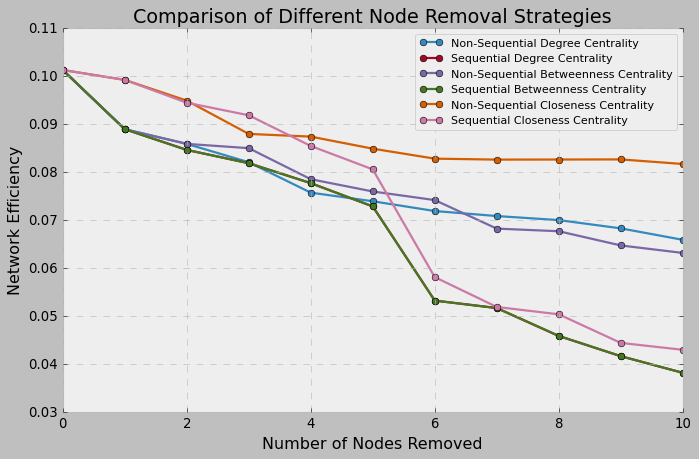

In [133]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))

# Non-sequential removal based on Degree Centrality
plt.plot(range(len(non_sequential_degree_results_df)), non_sequential_degree_results_df['Network Efficiency'], marker='o', label='Non-Sequential Degree Centrality')

# Sequential removal based on Degree Centrality
plt.plot(range(len(sequential_removal_results_df)), sequential_removal_results_df['Network Efficiency'], marker='o', label='Sequential Degree Centrality')

# Non-sequential removal based on Betweenness Centrality
plt.plot(range(len(non_sequential_betweenness_results_df)), non_sequential_betweenness_results_df['Network Efficiency'], marker='o', label='Non-Sequential Betweenness Centrality')

# Sequential removal based on Betweenness Centrality
plt.plot(range(len(sequential_removal_results_df_betweenness)), sequential_removal_results_df_betweenness['Network Efficiency'], marker='o', label='Sequential Betweenness Centrality')

# Non-sequential removal based on Closeness Centrality
plt.plot(range(len(non_sequential_closeness_results_df)), non_sequential_closeness_results_df['Network Efficiency'], marker='o', label='Non-Sequential Closeness Centrality')

# Sequential removal based on Closeness Centrality
plt.plot(range(len(sequential_removal_results_df_closeness)), sequential_removal_results_df_closeness['Network Efficiency'], marker='o', label='Sequential Closeness Centrality')

# Adding labels and title
plt.xlabel('Number of Nodes Removed')
plt.ylabel('Network Efficiency')
plt.title('Comparison of Different Node Removal Strategies')
plt.legend(fontsize='small')  # Adjusting legend font size
plt.grid(True)

# Show plot
plt.show()


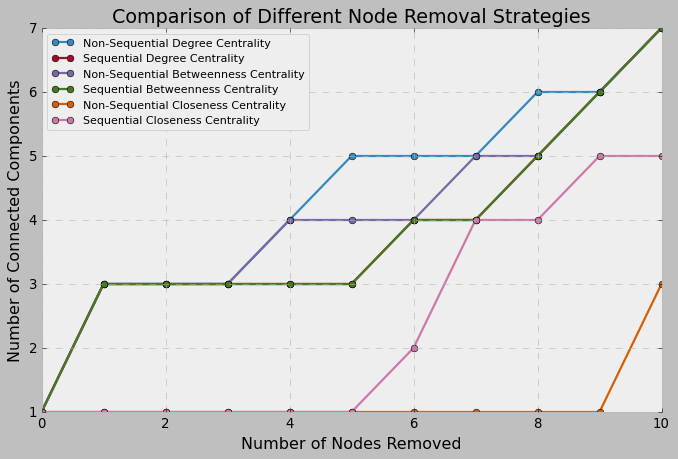

In [135]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))

# Non-sequential removal based on Degree Centrality
plt.plot(range(len(non_sequential_degree_results_df)), non_sequential_degree_results_df['Number of Connected Components'], marker='o', label='Non-Sequential Degree Centrality')

# Sequential removal based on Degree Centrality
plt.plot(range(len(sequential_removal_results_df)), sequential_removal_results_df['Number of Connected Components'], marker='o', label='Sequential Degree Centrality')

# Non-sequential removal based on Betweenness Centrality
plt.plot(range(len(non_sequential_betweenness_results_df)), non_sequential_betweenness_results_df['Number of Connected Components'], marker='o', label='Non-Sequential Betweenness Centrality')

# Sequential removal based on Betweenness Centrality
plt.plot(range(len(sequential_removal_results_df_betweenness)), sequential_removal_results_df_betweenness['Number of Connected Components'], marker='o', label='Sequential Betweenness Centrality')

# Non-sequential removal based on Closeness Centrality
plt.plot(range(len(non_sequential_closeness_results_df)), non_sequential_closeness_results_df['Number of Connected Components'], marker='o', label='Non-Sequential Closeness Centrality')

# Sequential removal based on Closeness Centrality
plt.plot(range(len(sequential_removal_results_df_closeness)), sequential_removal_results_df_closeness['Number of Connected Components'], marker='o', label='Sequential Closeness Centrality')

# Adding labels and title
plt.xlabel('Number of Nodes Removed')
plt.ylabel('Number of Connected Components')
plt.title('Comparison of Different Node Removal Strategies')
plt.legend(fontsize='small', loc='upper left')  # Moving legend to upper left corner
plt.grid(True)

# Show plot
plt.show()


### II. Flows: weighted network

#### II.1.  Consider the centrality measure derived in I. indicating the most relevant stations for assessing the vulnerability of the underground. What would you need to do to adjust this measure for a weighted network? Recompute the ranking of the 10 most important nodes according to this adjusted measure. Do you find the same ones as in I.1?

In [113]:
# Create a copy of the original graph G_1
G2 = G_1.copy()

# Calculate the reciprocal of flows as edge weights, considering a very small value added to avoid division by zero
inv_flows_updated = {(e1, e2): round(1. / (flows + 0.00000001), 7) for e1, e2, flows in G.edges(data='flows')}

# Set the edge attributes of the copied graph G2 with the recalculated edge weights
nx.set_edge_attributes(G2, inv_flows_updated, 'inv_flows')

# Print the first 15 edges of the original graph G along with their attributes
print(list(G.edges(data=True))[0:15])


[('South Kensington', 'Sloane Square', {'length': 1173.2056255427833, 'line_name': 'District', 'flows': 111349, 'station_1_': 'South Kensington', 'station_2_': 'Sloane Square'}), ('South Kensington', 'Gloucester Road', {'length': 751.3216330570068, 'line_name': 'Piccadilly', 'flows': 104165, 'station_1_': 'South Kensington', 'station_2_': 'Gloucester Road'}), ('South Kensington', 'Knightsbridge', {'length': 1300.7829472903957, 'line_name': 'Piccadilly', 'flows': 3187, 'station_1_': 'South Kensington', 'station_2_': 'Knightsbridge'}), ('Sloane Square', 'Victoria', {'length': 1165.734723962792, 'line_name': 'District', 'flows': 117825, 'station_1_': 'Sloane Square', 'station_2_': 'Victoria'}), ('Gloucester Road', 'High Street Kensington', {'length': 1005.1057545315349, 'line_name': 'Circle', 'flows': 7304, 'station_1_': 'Gloucester Road', 'station_2_': 'High Street Kensington'}), ('Gloucester Road', "Earl's Court", {'length': 910.1020304312578, 'line_name': 'Piccadilly', 'flows': 93186, 

##### Betweenness Centrality

In [84]:

betweenness_w_updated = nx.betweenness_centrality(G2, normalized=False, weight='inv_flows')
nx.set_node_attributes(G2, betweenness_w_updated, 'betweenness_w')

betweenness_w_df_updated = pd.DataFrame(index=G2.nodes())
betweenness_w_df_updated['betweenness_w'] = pd.Series(nx.get_node_attributes(G2, 'betweenness_w'))
betweenness_w_df_updated = betweenness_w_df_updated.sort_values(['betweenness_w'], ascending=False)
betweenness_w_df_updated[:10]


,betweenness_w
Green Park,46048.0
Bank and Monument,40883.0
Waterloo,30524.0
Westminster,28286.0
Liverpool Street,27130.0
Stratford,26648.0
Euston,22700.0
Victoria,21804.0
Oxford Circus,21800.0
Bond Street,20325.0


C:\Users\Cheny\AppData\Local\Temp\ipykernel_10624\2072650686.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 800x600 with 0 Axes>

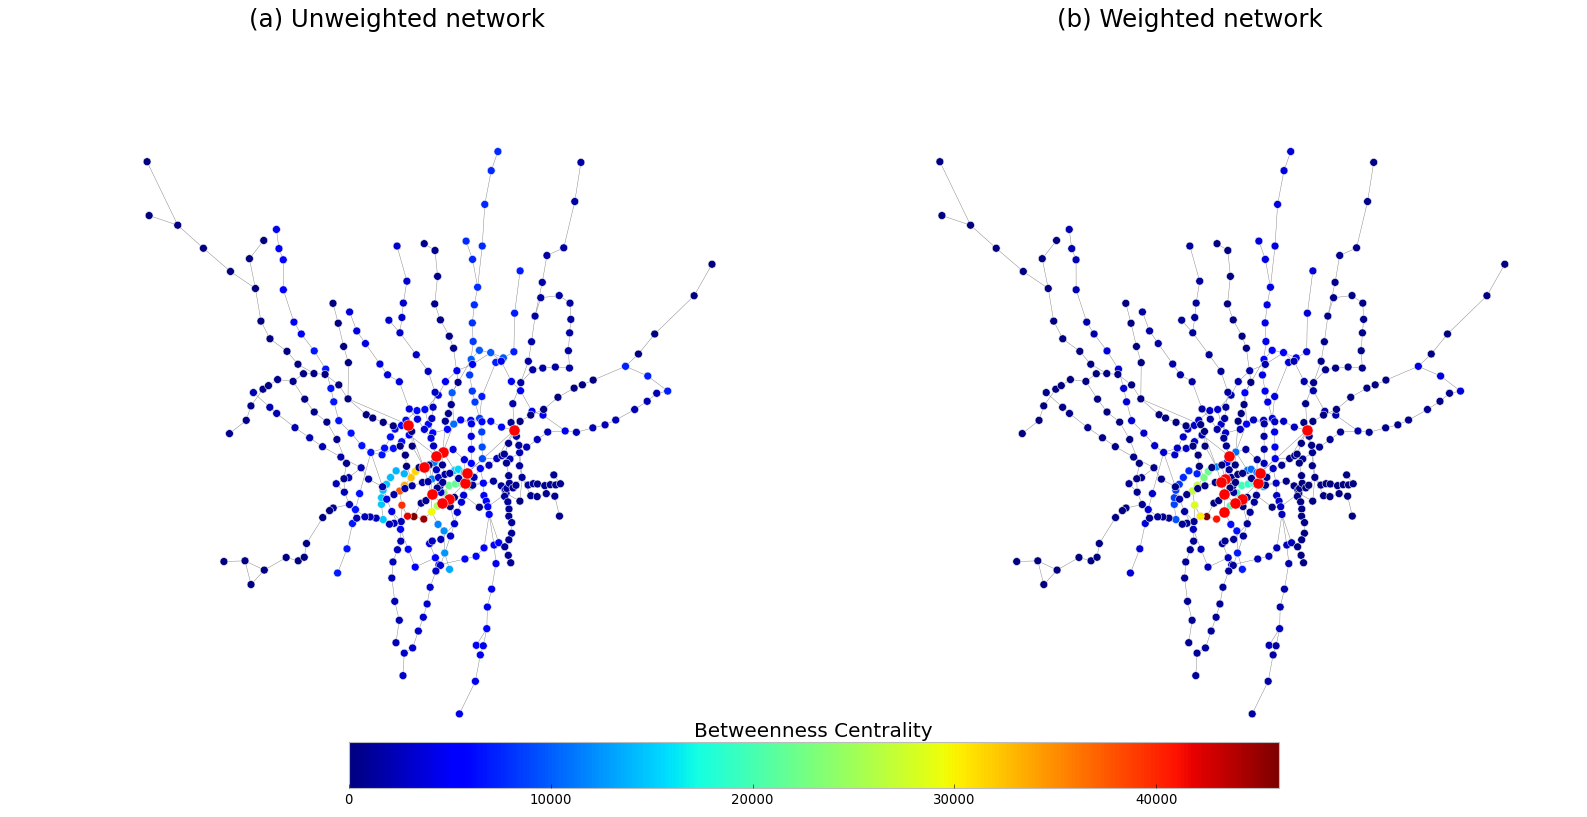

Overlapping nodes:
                Node
0             Euston
1   Liverpool Street
2         Green Park
3  Bank and Monument
4        Westminster
5          Stratford
6           Waterloo


In [82]:
# Retrieve the top ten nodes based on betweenness centrality for the weighted network
betweenness_w_df_updated = pd.DataFrame(index=G2.nodes())
betweenness_w_df_updated['betweenness_w'] = pd.Series(nx.get_node_attributes(G2, 'betweenness_w'))
betweenness_w_df_sorted = betweenness_w_df_updated.sort_values(['betweenness_w'], ascending=False)
top_betweenness_w = betweenness_w_df_sorted.head(10)

# Calculate betweenness centrality for the unweighted network and set as node attributes
bet_london_top = nx.betweenness_centrality(G, normalized=False)
nx.set_node_attributes(G, bet_london_top, 'betweenness_top')

# Retrieve the top ten nodes based on betweenness centrality for the unweighted network
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness_top'] = pd.Series(nx.get_node_attributes(G, 'betweenness_top'))
df_sorted = df.sort_values('betweenness_top', ascending=False)
top_betweenness_unw = df_sorted.head(10)

# Create the comparison plot for the two networks
plt.figure(dpi=100, facecolor='white')  # Set the figure background to white
fig, ax = plt.subplots(1, 2, figsize=(20, 12), facecolor='white')  # Set the subplot background to white

# Get node positions
pos = nx.get_node_attributes(G, 'coords')

# Plot the unweighted network
nodes = nx.draw_networkx_nodes(G, pos, node_size=50, ax=ax[0], node_color=df_sorted['betweenness_top'])
edges = nx.draw_networkx_edges(G, pos, edge_color='gray', width=0.4, ax=ax[0])
nx.draw_networkx_nodes(G, pos, nodelist=top_betweenness_unw.index, node_size=100, ax=ax[0], node_color='red')
ax[0].set_title("(a) Unweighted network", fontsize=22)
ax[0].axis('off')

# Plot the weighted network
nodes = nx.draw_networkx_nodes(G2, pos, node_size=50, ax=ax[1], node_color=betweenness_w_df_sorted['betweenness_w'])
edges = nx.draw_networkx_edges(G2, pos, edge_color='gray', width=0.4, ax=ax[1])
nx.draw_networkx_nodes(G2, pos, nodelist=top_betweenness_w.index, node_size=100, ax=ax[1], node_color='red')
ax[1].set_title("(b) Weighted network", fontsize=22)
ax[1].axis('off')

# Add the color bar
cbar = plt.colorbar(nodes, orientation="horizontal", shrink=0.75, ax=ax.ravel().tolist(), pad=0.02)
cbar.set_label("Betweenness Centrality", fontsize=18)
cbar.ax.xaxis.set_label_position('top')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # Adjust the bottom of the subplots to give more space for the color bar
plt.show()

# Output overlapping top ten nodes by betweenness centrality in both networks
overlapping_nodes = set(top_betweenness_unw.index) & set(top_betweenness_w.index)
overlapping_nodes_df = pd.DataFrame(list(overlapping_nodes), columns=['Node'])
print("Overlapping nodes:")
print(overlapping_nodes_df)


##### Closeness Centrality

In [92]:

# Calculate Closeness Centrality with weighted edges
closeness_w_updated = nx.closeness_centrality(G2, distance='inv_flows')

# Set node attributes with Closeness Centrality values
nx.set_node_attributes(G2, closeness_w_updated, 'closeness_w')

# Create a DataFrame to store the Closeness Centrality values
closeness_w_df_updated = pd.DataFrame(index=G2.nodes())
closeness_w_df_updated['closeness_w'] = pd.Series(nx.get_node_attributes(G2, 'closeness_w'))

# Sort the DataFrame by Closeness Centrality values in descending order
closeness_w_df_updated = closeness_w_df_updated.sort_values(['closeness_w'], ascending=False)

# Display the top 10 nodes by Closeness Centrality
# print(closeness_w_df_updated[:10])
# Format the 'closeness_w' column to show five decimal places
closeness_w_df_updated['closeness_w'] = closeness_w_df_updated['closeness_w'].map('{:.9f}'.format)

# Print the top ten values in the 'closeness_w' column
# print(closeness_w_df_updated['closeness_w'].head(10))
closeness_w_df_updated[:10]


,closeness_w
Green Park,0.000001000
Westminster,0.000001000
Waterloo,0.000001000
Bank and Monument,0.000001000
Oxford Circus,0.000001000
Victoria,0.000001000
Bond Street,0.000001000
Liverpool Street,0.000001000
Warren Street,0.000001000
Sloane Square,0.000001000


C:\Users\Cheny\AppData\Local\Temp\ipykernel_10624\1711986252.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 800x600 with 0 Axes>

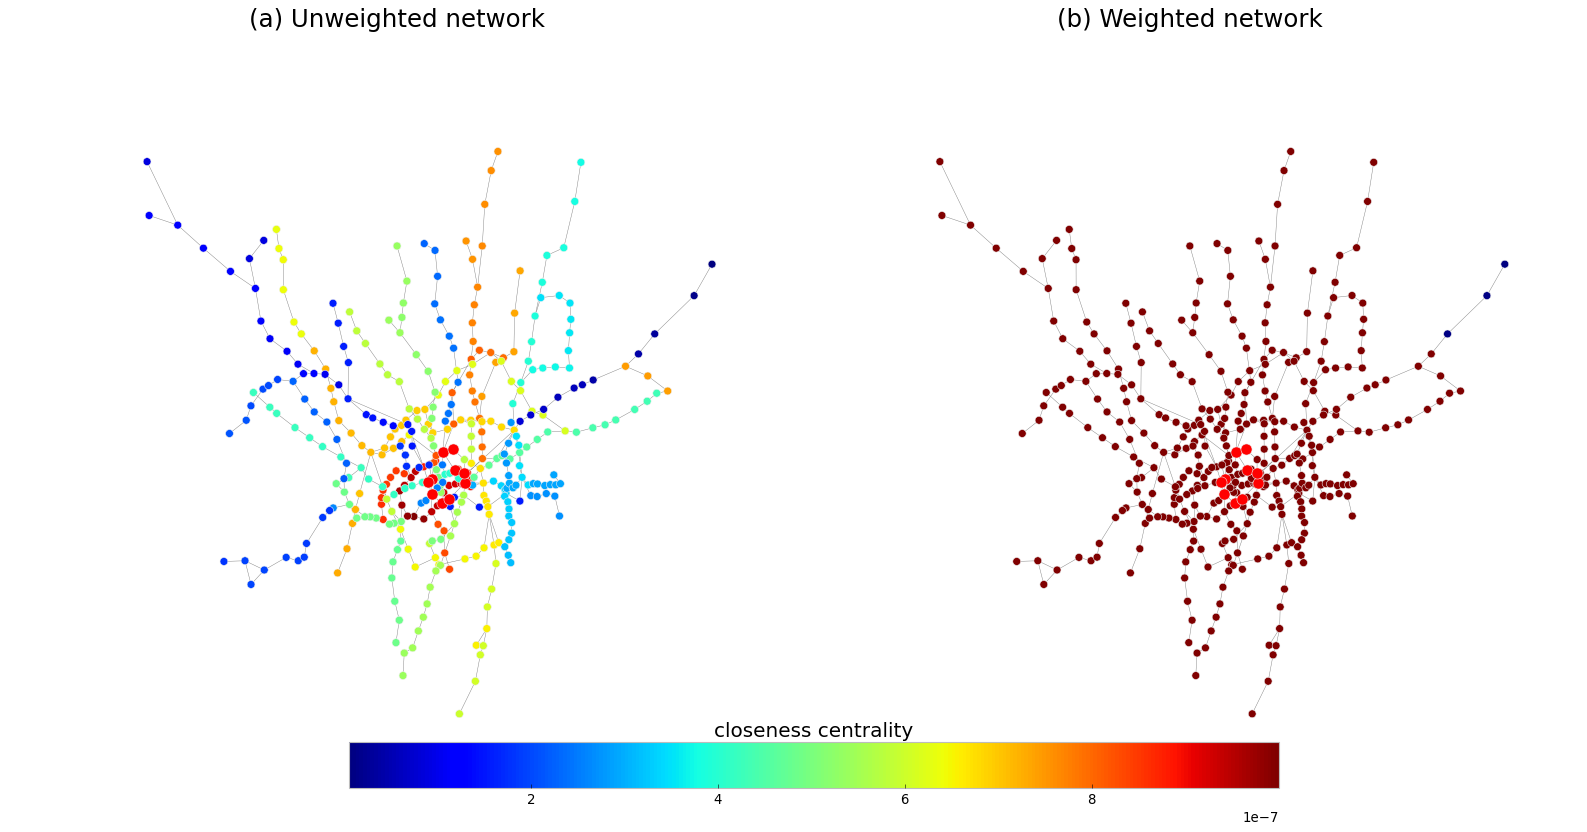

Overlapping nodes:
                       Node
0                Farringdon
1               Bond Street
2                  Moorgate
3  King's Cross St. Pancras
4             Oxford Circus
5                     Angel
6                Green Park
7         Bank and Monument
8               Westminster
9                  Waterloo


In [90]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt


# Retrieve the top ten nodes based on weighted closeness centrality
closeness_w_df_updated = pd.DataFrame(index=G2.nodes())
closeness_w_df_updated['closeness_w'] = pd.Series(nx.get_node_attributes(G2, 'closeness_w'))
closeness_w_df_sorted = closeness_w_df_updated.sort_values(['closeness_w'], ascending=False)


# Calculate betweenness centrality for the unweighted network and set as node attributes
bet_london_top = nx.closeness_centrality(G)
nx.set_node_attributes(G, bet_london_top, 'closeness_top')

# Retrieve the top ten nodes based on betweenness centrality for the unweighted network
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['closeness_top'] = pd.Series(nx.get_node_attributes(G, 'closeness_top'))
df_sorted = df.sort_values('closeness_top', ascending=False)
top_closeness_unw = df_sorted.head(10)

# Create the comparison plot for the two networks
plt.figure(dpi=100, facecolor='white')  # Set the figure background to white
fig, ax = plt.subplots(1, 2, figsize=(20, 12), facecolor='white')  # Set the subplot background to white

# Get node positions
pos = nx.get_node_attributes(G, 'coords')

# Plot the unweighted network
nodes = nx.draw_networkx_nodes(G, pos, node_size=50, ax=ax[0], node_color=df_sorted['closeness_top'])
edges = nx.draw_networkx_edges(G, pos, edge_color='gray', width=0.4, ax=ax[0])
nx.draw_networkx_nodes(G, pos, nodelist=top_closeness_unw.index, node_size=100, ax=ax[0], node_color='red')
ax[0].set_title("(a) Unweighted network", fontsize=22)
ax[0].axis('off')

# Plot the weighted network
nodes = nx.draw_networkx_nodes(G2, pos, node_size=50, ax=ax[1], node_color=closeness_w_df_sorted['closeness_w'])
edges = nx.draw_networkx_edges(G2, pos, edge_color='gray', width=0.4, ax=ax[1])
nx.draw_networkx_nodes(G2, pos, nodelist=top_closeness_unw.index, node_size=100, ax=ax[1], node_color='red')
ax[1].set_title("(b) Weighted network", fontsize=22)
ax[1].axis('off')

# Add the color bar
cbar = plt.colorbar(nodes, orientation="horizontal", shrink=0.75, ax=ax.ravel().tolist(), pad=0.02)
cbar.set_label("closeness centrality", fontsize=18)
cbar.ax.xaxis.set_label_position('top')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  
plt.show()

# Output overlapping top ten nodes by betweenness centrality in both networks
overlapping_nodes = set(top_closeness_unw.index) & set(top_closeness_unw.index)
overlapping_nodes_df = pd.DataFrame(list(overlapping_nodes), columns=['Node'])
print("Overlapping nodes:")
print(overlapping_nodes_df)

#### II.2. Now consider the measure for assessing the impact of node removal. Would you adjust the 
measure for a weighted network? If yes, how? Propose a different measure that would be better at 
assessing the impact of closing a station taking into consideration the passengers.


In [114]:
# Calculates global efficiency for a weighted graph
def efficiency_weighted(G2, u, v, weight):
   try:
       eff = 1 / nx.shortest_path_length(G, u, v, weight='inv_flows')
   except NetworkXNoPath:
       eff = 0
   return eff

def global_efficiency_weighted(G):
   n = len(G)
   denom = n * (n - 1)
   if denom != 0:
       g_eff = sum(efficiency_weighted(G, u, v, weight='inv_flows') for u, v in G.edges()) / denom
   else:
       g_eff = 0
   return g_eff

In [115]:
GE_W = global_efficiency_weighted(G)
GE_W

0.0029114713216957604

#### II.3. Remove only the 3 highest ranked nodes according to the best performing centrality measure 
found in I.1. Evaluate the impact according to the 2 measures in II.2. Repeat the experiment for the 
highest 3 ranked nodes using the adjusted measure. Critically discuss which station closure will have 
the largest impact on passengers, referring to your measures and results.


In [109]:
network_copy = G_1.copy()

avg_clust_bef = nx.average_clustering(G2, weight='inv_flows')
wei_bef = nx.average_shortest_path_length(G2, weight='inv_flows')

print('Weighted - Before removing nodes, cluster coefficient:', avg_clust_bef)
print('Weighted - Before removing nodes, shortest path:', wei_bef)


network_copy.remove_nodes_from(['Stratford'])
network_copy.remove_nodes_from(['Bank and Monument'])
network_copy.remove_nodes_from(['Liverpool Street'])

avg_clust_aft = nx.average_clustering(G2, weight='inv_flows')
wei_aft = nx.average_shortest_path_length(G2, weight='inv_flows')

print('Weighted - After removing nodes, cluster coefficient:', avg_clust_aft)
print('Weighted - After removing nodes, shortest path:', wei_aft)


wei_ratio = (wei_aft - wei_bef) / wei_bef
clust_ratio = (avg_clust_aft - avg_clust_bef) / avg_clust_bef

print(f'Change rate of path: {wei_ratio:.2%}')
print(f'Change rate of cluster coefficient: {clust_ratio:.2%}')

Weighted - Before removing nodes, cluster coefficient: 7.275858791126948e-14
Weighted - Before removing nodes, shortest path: 1992518.7040472815
Weighted - After removing nodes, cluster coefficient: 7.275858791126948e-14
Weighted - After removing nodes, shortest path: 1992518.7040472815
Change rate of path: 0.00%
Change rate of cluster coefficient: 0.00%


In [126]:

network_copy = G_1.copy()

clustering_coef_initial = nx.average_clustering(network_copy)
path_length_initial = nx.average_shortest_path_length(network_copy)

print('Unweighted - Before node removal: Clustering Coefficient', clustering_coef_initial)
print('Unweighted - Before node removal: Average Shortest Path Length', path_length_initial)


network_copy.remove_nodes_from(['Stratford'])
network_copy.remove_nodes_from(['Bank and Monument'])
network_copy.remove_nodes_from(['Liverpool Street'])

clustering_coef_final = nx.average_clustering(network_copy)

largest_cc = max(nx.connected_components(network_copy), key=len)
path_length_largest_cc = nx.average_shortest_path_length(network_copy.subgraph(largest_cc))

print('Unweighted - After node removal: Clustering Coefficient', clustering_coef_final)
print('Unweighted - After node removal: Average Shortest Path Length', path_length_largest_cc)


path_length_change = (path_length_largest_cc - path_length_initial) / path_length_initial
clustering_change = (clustering_coef_final - clustering_coef_initial) / clustering_coef_initial

print(f'Path Length Change Rate: {path_length_change:.2%}')
print(f'Clustering Coefficient Change Rate: {clustering_change:.2%}')


Unweighted - Before node removal: Clustering Coefficient 0.030382377389858696
Unweighted - Before node removal: Average Shortest Path Length 13.545997506234414
Unweighted - After node removal: Clustering Coefficient 0.030102895429528605
Unweighted - After node removal: Average Shortest Path Length 15.03120943619843
Path Length Change Rate: 10.96%
Clustering Coefficient Change Rate: -0.92%


In [123]:
import networkx as nx

# 假设 G_1 是你的初始图
network_copy = G_1.copy()

# 计算初始的聚类系数和平均最短路径长度（不加权）
clustering_coef_initial = nx.average_clustering(network_copy)  # 不使用权重
path_length_initial = nx.average_shortest_path_length(network_copy)  # 不使用权重

print('Unweighted - Before node removal: Clustering Coefficient', clustering_coef_initial)
print('Unweighted - Before node removal: Average Shortest Path Length', path_length_initial)
print('-----------------------------------------------------------------------')

# 要检查的站点列表
stations = ['Stratford', 'Bank and Monument', 'Liverpool Street']

# 用于存储每个站点的影响结果
impact_results = []

for station in stations:
    # 复制网络，以便于重复使用初始状态
    temp_network = network_copy.copy()
    
    # 移除一个节点
    temp_network.remove_node(station)
    
    # 计算聚类系数变化（不加权）
    clustering_coef = nx.average_clustering(temp_network)  # 不使用权重

    # 获取最大连通组件并计算平均最短路径长度（不加权）
    largest_cc = max(nx.connected_components(temp_network), key=len)
    path_length_cc = nx.average_shortest_path_length(temp_network.subgraph(largest_cc))  # 不使用权重
    
    # 计算变化率
    path_length_change = (path_length_cc - path_length_initial) / path_length_initial
    clustering_change = (clustering_coef - clustering_coef_initial) / clustering_coef_initial
    
    impact_results.append((station, path_length_change, clustering_change))

    print(f'{station} - Path Length Change Rate: {path_length_change:.2%}')
    print(f'{station} - Clustering Coefficient Change Rate: {clustering_change:.2%}')
    print('-----------------------------------------------------------------------')

# 打印每个站点的影响
for result in impact_results:
    station, path_change, cluster_change = result
    print(f'Station: {station}, Path Length Change Rate: {path_change:.2%}, Clustering Coefficient Change Rate: {cluster_change:.2%}')


Unweighted - Before node removal: Clustering Coefficient 0.030382377389858696
Unweighted - Before node removal: Average Shortest Path Length 13.545997506234414
-----------------------------------------------------------------------
Stratford - Path Length Change Rate: 7.02%
Stratford - Clustering Coefficient Change Rate: 0.80%
-----------------------------------------------------------------------
Bank and Monument - Path Length Change Rate: 4.32%
Bank and Monument - Clustering Coefficient Change Rate: -1.69%
-----------------------------------------------------------------------
Liverpool Street - Path Length Change Rate: 4.09%
Liverpool Street - Clustering Coefficient Change Rate: -1.96%
-----------------------------------------------------------------------
Station: Stratford, Path Length Change Rate: 7.02%, Clustering Coefficient Change Rate: 0.80%
Station: Bank and Monument, Path Length Change Rate: 4.32%, Clustering Coefficient Change Rate: -1.69%
Station: Liverpool Street, Path 

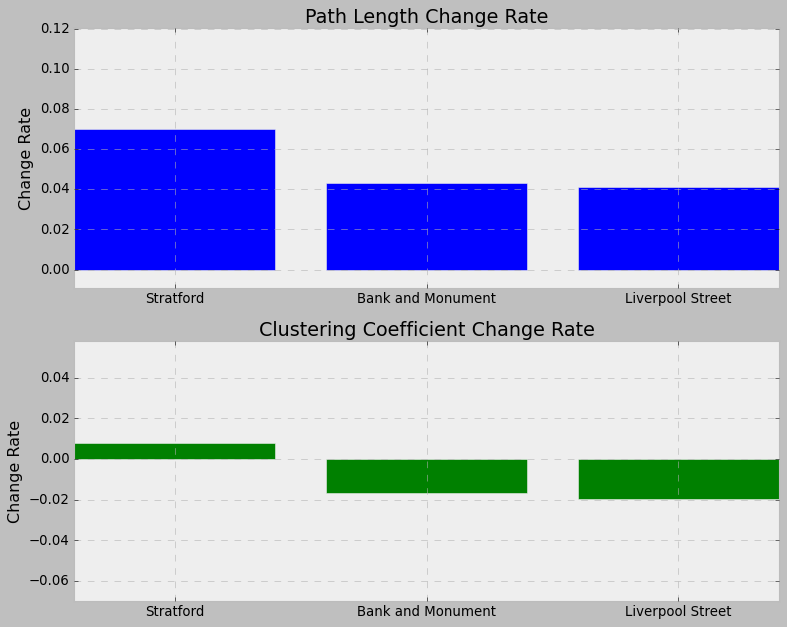

In [124]:
# 假设前面的代码块已经执行过，以下是添加可视化部分的代码：

import matplotlib.pyplot as plt

# 假设 impact_results 已经被计算并填充
# stations = ['Stratford', 'Bank and Monument', 'Liverpool Street']
# impact_results = [(station, path_length_change, clustering_change), ...]

# 分别存储路径长度变化率和聚类系数变化率
path_changes = [result[1] for result in impact_results]
cluster_changes = [result[2] for result in impact_results]

# 创建一个图表，包含两个子图
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# 子图1: 路径长度变化率
axs[0].bar(stations, path_changes, color='blue')
axs[0].set_title('Path Length Change Rate')
axs[0].set_ylabel('Change Rate')
axs[0].set_ylim([min(path_changes) - 0.05, max(path_changes) + 0.05])  # 设置 y 轴界限略低于最低值，略高于最高值

# 子图2: 聚类系数变化率
axs[1].bar(stations, cluster_changes, color='green')
axs[1].set_title('Clustering Coefficient Change Rate')
axs[1].set_ylabel('Change Rate')
axs[1].set_ylim([min(cluster_changes) - 0.05, max(cluster_changes) + 0.05])  # 设置 y 轴界限略低于最低值，略高于最高值

# 自动调整子图布局，防止标题和轴标签重叠
plt.tight_layout()

# 显示图表
plt.show()


In [127]:
import networkx as nx

# 假设 G_1 是你的初始图
network_copy = G_1.copy()

# 计算初始的聚类系数和平均最短路径长度
clustering_coef_initial = nx.average_clustering(network_copy, weight='inv_flows') # 加权
path_length_initial = nx.average_shortest_path_length(network_copy, weight='inv_flows') # 加权

print('Weighted - Before node removal: Clustering Coefficient', clustering_coef_initial)
print('Weighted - Before node removal: Average Shortest Path Length', path_length_initial)
print('-----------------------------------------------------------------------')
# 要检查的站点列表
stations = ['Stratford', 'Bank and Monument', 'Liverpool Street']

# 用于存储每个站点的影响结果
impact_results = []

for station in stations:
    # 复制网络，以便于重复使用初始状态
    temp_network = network_copy.copy()
    
    # 移除一个节点
    temp_network.remove_node(station)
    
    # 计算聚类系数变化
    clustering_coef = nx.average_clustering(temp_network, weight='inv_flows') # 加权

    # 获取最大连通组件并计算平均最短路径长度
    largest_cc = max(nx.connected_components(temp_network), key=len)
    path_length_cc = nx.average_shortest_path_length(temp_network.subgraph(largest_cc), weight='inv_flows') # 加权
    
    # 计算变化率
    path_length_change = (path_length_cc - path_length_initial) / path_length_initial
    clustering_change = (clustering_coef - clustering_coef_initial) / clustering_coef_initial
    
    impact_results.append((station, path_length_change, clustering_change))

    print(f'{station} - Path Length Change Rate: {path_length_change:.2%}')
    print(f'{station} - Clustering Coefficient Change Rate: {clustering_change:.2%}')
    print('-----------------------------------------------------------------------')
# 打印每个站点的影响
for result in impact_results:
    station, path_change, cluster_change = result
    print(f'Station: {station}, Path Length Change Rate: {path_change:.2%}, Clustering Coefficient Change Rate: {cluster_change:.2%}')


Weighted - Before node removal: Clustering Coefficient 7.275858791126948e-14
Weighted - Before node removal: Average Shortest Path Length 1992518.7040472815
-----------------------------------------------------------------------
Stratford - Path Length Change Rate: 5.80%
Stratford - Clustering Coefficient Change Rate: 0.64%
-----------------------------------------------------------------------
Bank and Monument - Path Length Change Rate: 0.25%
Bank and Monument - Clustering Coefficient Change Rate: 0.16%
-----------------------------------------------------------------------
Liverpool Street - Path Length Change Rate: 0.25%
Liverpool Street - Clustering Coefficient Change Rate: 0.14%
-----------------------------------------------------------------------
Station: Stratford, Path Length Change Rate: 5.80%, Clustering Coefficient Change Rate: 0.64%
Station: Bank and Monument, Path Length Change Rate: 0.25%, Clustering Coefficient Change Rate: 0.16%
Station: Liverpool Street, Path Length

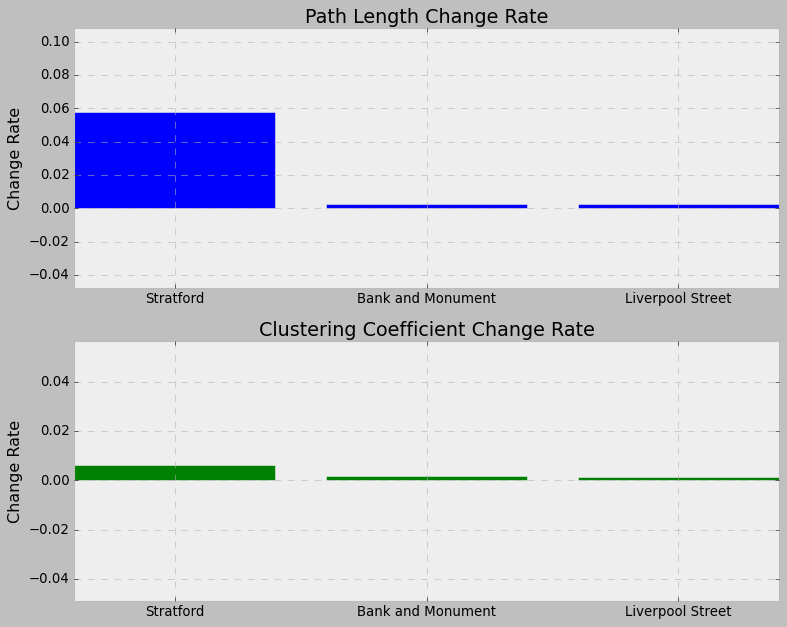

In [128]:
# 假设前面的代码块已经执行过，以下是添加可视化部分的代码：

import matplotlib.pyplot as plt

# 假设 impact_results 已经被计算并填充
# stations = ['Stratford', 'Bank and Monument', 'Liverpool Street']
# impact_results = [(station, path_length_change, clustering_change), ...]

# 分别存储路径长度变化率和聚类系数变化率
path_changes = [result[1] for result in impact_results]
cluster_changes = [result[2] for result in impact_results]

# 创建一个图表，包含两个子图
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# 子图1: 路径长度变化率
axs[0].bar(stations, path_changes, color='blue')
axs[0].set_title('Path Length Change Rate')
axs[0].set_ylabel('Change Rate')
axs[0].set_ylim([min(path_changes) - 0.05, max(path_changes) + 0.05])  # 设置 y 轴界限略低于最低值，略高于最高值

# 子图2: 聚类系数变化率
axs[1].bar(stations, cluster_changes, color='green')
axs[1].set_title('Clustering Coefficient Change Rate')
axs[1].set_ylabel('Change Rate')
axs[1].set_ylim([min(cluster_changes) - 0.05, max(cluster_changes) + 0.05])  # 设置 y 轴界限略低于最低值，略高于最高值

# 自动调整子图布局，防止标题和轴标签重叠
plt.tight_layout()

# 显示图表
plt.show()


## Part 2: Spatial Interaction models
For this section, you will be given a “symbolic” population and the number of jobs for the stations in 
the underground. You will also be given the number of people that commute from one station to 
another, through an OD matrix. 


### III. Models and calibration


#### III.1. Briefly introduce the spatial interaction models covered in the lectures using equations and 
defining the terms, taking particular care in explaining the role of the parameters. 


#### III.2. Using the information of population, jobs and flows, select a spatial interaction model and 
calibrate the parameter for the cost function (usually denoted as b). It is essential that you justify the 
model selected.


### IV. Scenarios


#### IV.1. Scenario A: assume that Canary Wharf has a 50% decrease in jobs after Brexit. Using the 
calibrated parameter b, compute the new flows for scenario A. Make sure the number of commuters is 
conserved, and explain how you ensured this.


#### IV.2. Scenario B: assume that there is a significant increase in the cost of transport. Select 2 values for 
the parameter in the cost function reflecting scenario B. Recompute the distribution of flows.


#### IV.3. Discuss how the flows change for the 3 different situations: scenario A, and scenario B with two 
selections of parameters. Which scenario would have more impact in the redistribution of flows? 
Explain and justify your answers using the results of the analysis